<a href="https://colab.research.google.com/github/Pingarilho/BP/blob/main/BP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratamento de Dados


Instalação de Bibliotecas

In [104]:
!pip install shap
!pip install category_encoders


Importação de Bibliotecas

In [105]:
import pandas as pd
import sklearn as sl
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
import shap

Importação dos Dados

In [112]:
df = pd.read_csv('/content/DCG1_1.CSV', delimiter=';')

df.head()


,BP,VPMIN,VPMAX,VP,D.WR,V.WR,P.SEQ,A.SEQ,DATE,GP_HIT_PRCT,GP_MISS_DSK_PRCT,MAX_ASYNC_IO_DLY_MS,SYNC_IO_DLY_MS,MAX_SYNC_IO_DLY_MS,SYNC_IO_S,NON-DCRYPY_RD_MBS,NON_ENCRYP_WRT_MBS,BP_SZ_GB,PG_USED_BP_GB,CHG_PG_WRT_GB
0,BP0,60160,80128,10,30,5,50,50,01/02/2024 00:00,8584,97,296,16,586,3,1,0,24,0,0
1,BP1,524288,655360,80,30,5,50,50,01/02/2024 00:00,9861,88,347,34,1087,1,1,1,1600,1,0
2,BP11,1572864,3145728,80,30,1,50,50,01/02/2024 00:00,9962,9,34728,27,29736,0,0,0,600,0,0
3,BP12,100000,125000,10,30,1,50,50,01/02/2024 00:00,9876,4,1305,18,1448,9,1,3,1600,2,0
4,BP2,524288,655360,10,30,5,50,50,01/02/2024 00:00,9878,21,956,18,1089,9,14,0,1600,2,0


In [107]:
# Dimensoes
df.shape

(13236, 20)

In [108]:
# Formato
df.dtypes

BP                     object
VPMIN                   int64
VPMAX                   int64
VP                      int64
D.WR                    int64
V.WR                    int64
P.SEQ                   int64
A.SEQ                   int64
DATE                   object
GP_HIT_PRCT             int64
GP_MISS_DSK_PRCT        int64
MAX_ASYNC_IO_DLY_MS     int64
SYNC_IO_DLY_MS          int64
MAX_SYNC_IO_DLY_MS      int64
SYNC_IO_S               int64
NON-DCRYPY_RD_MBS       int64
NON_ENCRYP_WRT_MBS      int64
BP_SZ_GB                int64
PG_USED_BP_GB           int64
CHG_PG_WRT_GB           int64
dtype: object

In [109]:
df.isnull().sum()

BP                     0
VPMIN                  0
VPMAX                  0
VP                     0
D.WR                   0
V.WR                   0
P.SEQ                  0
A.SEQ                  0
DATE                   0
GP_HIT_PRCT            0
GP_MISS_DSK_PRCT       0
MAX_ASYNC_IO_DLY_MS    0
SYNC_IO_DLY_MS         0
MAX_SYNC_IO_DLY_MS     0
SYNC_IO_S              0
NON-DCRYPY_RD_MBS      0
NON_ENCRYP_WRT_MBS     0
BP_SZ_GB               0
PG_USED_BP_GB          0
CHG_PG_WRT_GB          0
dtype: int64

In [110]:
#Colunas

print(df.columns.tolist())


['BP', 'VPMIN', 'VPMAX', 'VP', 'D.WR', 'V.WR', 'P.SEQ', 'A.SEQ', 'DATE', 'GP_HIT_PRCT', 'GP_MISS_DSK_PRCT', 'MAX_ASYNC_IO_DLY_MS', 'SYNC_IO_DLY_MS', 'MAX_SYNC_IO_DLY_MS', 'SYNC_IO_S', 'NON-DCRYPY_RD_MBS', 'NON_ENCRYP_WRT_MBS', 'BP_SZ_GB', 'PG_USED_BP_GB', 'CHG_PG_WRT_GB']


In [122]:
#Divisão de inputs e outputs

parametros = df[['VPMIN', 'VPMAX', 'VP', 'D.WR', 'V.WR', 'P.SEQ', 'A.SEQ', 'BP_SZ_GB']]

metricas = df[['GP_HIT_PRCT', 'GP_MISS_DSK_PRCT', 'MAX_ASYNC_IO_DLY_MS', 'SYNC_IO_DLY_MS', 'MAX_SYNC_IO_DLY_MS', 'SYNC_IO_S', 'NON-DCRYPY_RD_MBS', 'NON_ENCRYP_WRT_MBS', 'PG_USED_BP_GB', 'CHG_PG_WRT_GB']]

metricas1 = df[['GP_MISS_DSK_PRCT', 'MAX_ASYNC_IO_DLY_MS', 'SYNC_IO_DLY_MS', 'MAX_SYNC_IO_DLY_MS', 'SYNC_IO_S', 'NON-DCRYPY_RD_MBS', 'NON_ENCRYP_WRT_MBS', 'PG_USED_BP_GB', 'CHG_PG_WRT_GB']]

hit = np.where(df['GP_HIT_PRCT'] > 9700, 1, 0)

Correlação das Metricas

In [124]:
corr = metricas1.corr()
corr.style.background_gradient(cmap='coolwarm')

,GP_MISS_DSK_PRCT,MAX_ASYNC_IO_DLY_MS,SYNC_IO_DLY_MS,MAX_SYNC_IO_DLY_MS,SYNC_IO_S,NON-DCRYPY_RD_MBS,NON_ENCRYP_WRT_MBS,PG_USED_BP_GB,CHG_PG_WRT_GB
GP_MISS_DSK_PRCT,1.000000,-0.028527,0.055248,0.017177,-0.004356,-0.055340,-0.041893,-0.109935,-0.009251
MAX_ASYNC_IO_DLY_MS,-0.028527,1.000000,0.031483,0.239856,0.075485,0.062672,0.011516,0.139088,-0.000695
SYNC_IO_DLY_MS,0.055248,0.031483,1.000000,0.256251,-0.036721,-0.023415,-0.006931,-0.007814,-0.008201
MAX_SYNC_IO_DLY_MS,0.017177,0.239856,0.256251,1.000000,0.137362,0.061133,0.010434,0.068535,-0.003963
SYNC_IO_S,-0.004356,0.075485,-0.036721,0.137362,1.000000,0.362611,0.126572,0.254639,0.197071
NON-DCRYPY_RD_MBS,-0.055340,0.062672,-0.023415,0.061133,0.362611,1.000000,0.197950,0.233741,0.141706
NON_ENCRYP_WRT_MBS,-0.041893,0.011516,-0.006931,0.010434,0.126572,0.197950,1.000000,0.019927,0.227192
PG_USED_BP_GB,-0.109935,0.139088,-0.007814,0.068535,0.254639,0.233741,0.019927,1.000000,0.026624
CHG_PG_WRT_GB,-0.009251,-0.000695,-0.008201,-0.003963,0.197071,0.141706,0.227192,0.026624,1.000000


Resultado da classificação 88.77%


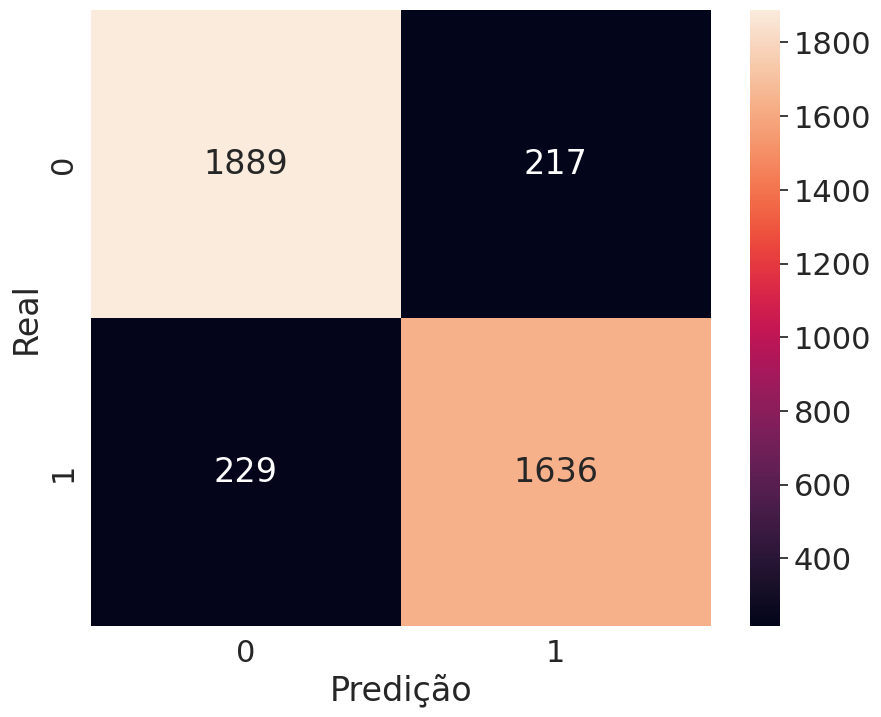

In [126]:
from sklearn.feature_selection import RFE
from numpy import random

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(metricas1,
                                                       hit,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))


RFECV

Resultado da classificação 90.13%


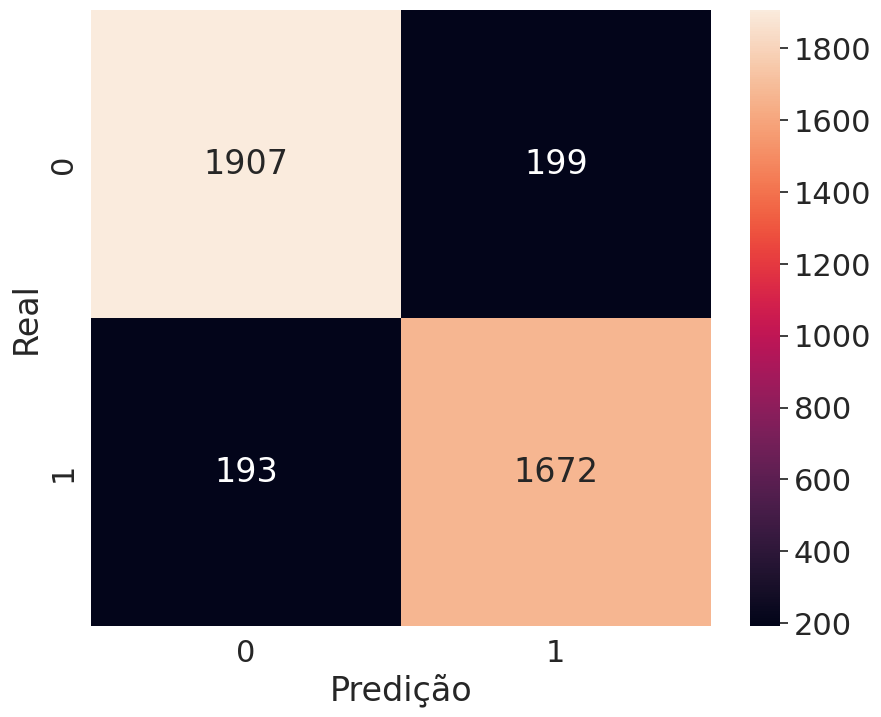

In [127]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(metricas1,
                                                       hit,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfecv = RFECV(estimator = classificador, cv = 5, scoring = "accuracy", step = 1)
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfecv, teste_y)* 100))


In [133]:
treino_x.columns[selecionador_rfecv.support_]

Index(['GP_MISS_DSK_PRCT', 'MAX_ASYNC_IO_DLY_MS', 'SYNC_IO_DLY_MS',
       'MAX_SYNC_IO_DLY_MS', 'SYNC_IO_S', 'NON-DCRYPY_RD_MBS',
       'NON_ENCRYP_WRT_MBS', 'PG_USED_BP_GB'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

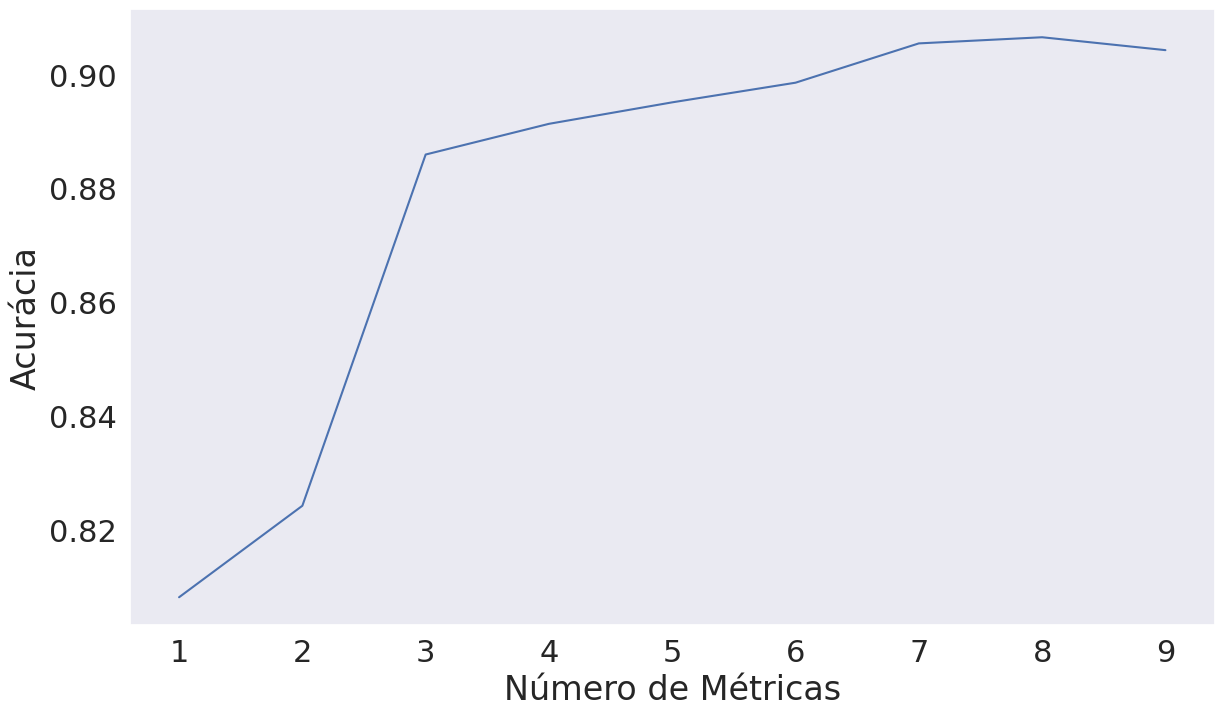

In [140]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("Número de Métricas")
plt.ylabel("Acurácia")
plt.grid()

plt.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score']) + 1), selecionador_rfecv.cv_results_['mean_test_score'])
plt.show

PCA

In [143]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
metricas2 = pca.fit_transform(metricas1)

<Axes: >

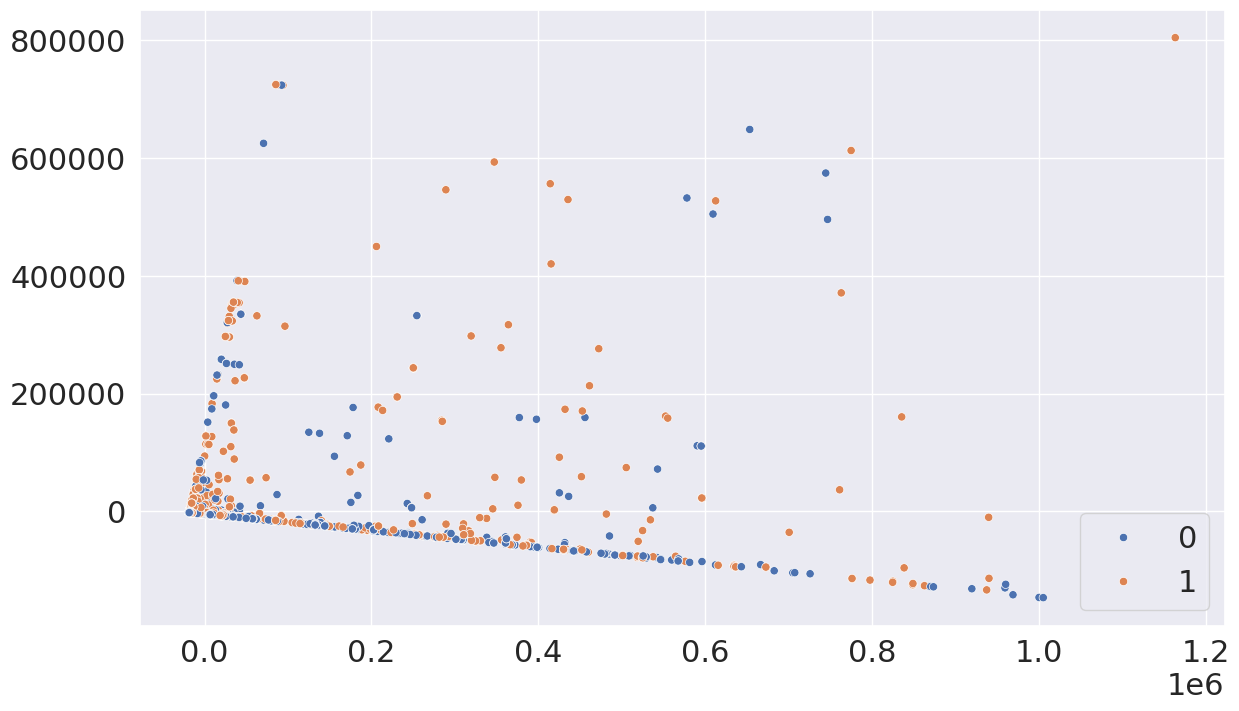

In [145]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x = metricas2[:,0], y = metricas2[:,1], hue = hit)

TSNE

<Axes: >

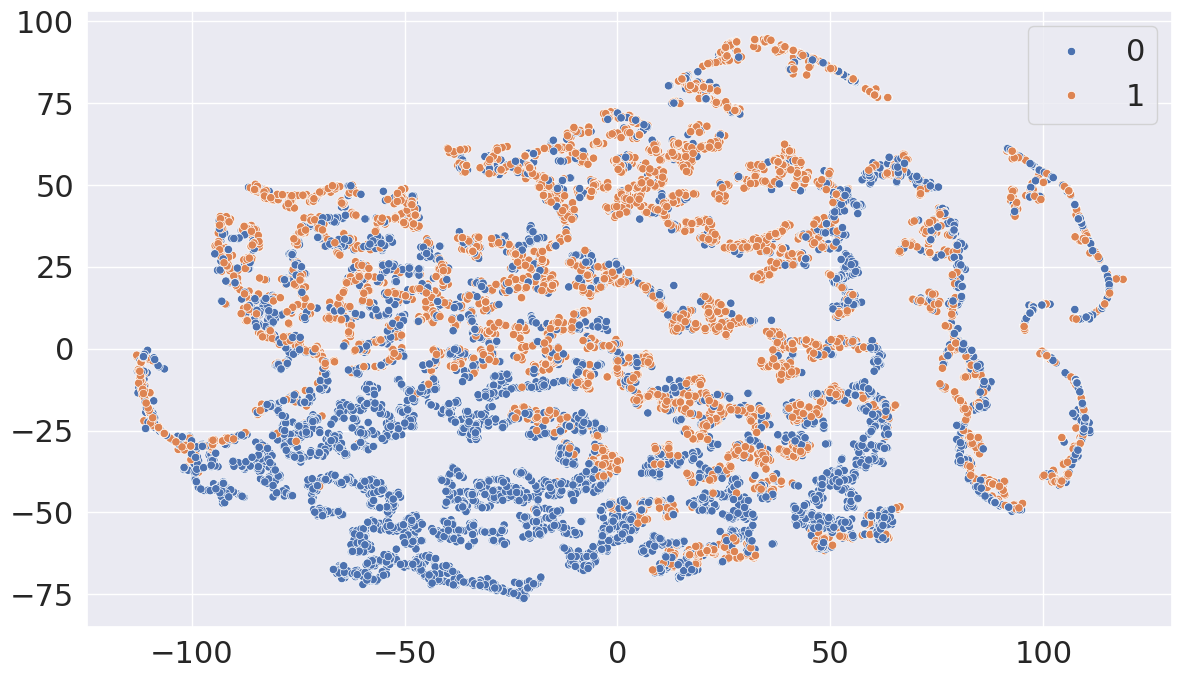

In [146]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
metricas3 = tsne.fit_transform(metricas1)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = metricas3[:,0], y = metricas3[:,1], hue = hit)

Padronização de Dados

In [88]:
from sklearn.preprocessing import StandardScaler

In [103]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)



In [90]:
X_normalizado[0]

array([-1.07272976, -0.88999866, -0.87090974, -0.08680995,  0.2429286 ,
        0.        ,  0.08680995, -1.07892774])

# TREINO

In [91]:
#treino com HIT
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, Hit, test_size=0.3, random_state=123)

In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

KNN - K-neighbors

In [93]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='euclidean')

knn.fit(X_treino, y_treino)

knn.score(X_teste,y_teste)

#predito_knn = knn.predict(X_teste)


0.7232435154872828

In [102]:
# prompt: transforme Hit em dataframe

Hit = pd.DataFrame(Hit)


In [101]:
X

,VPMIN,VPMAX,VP,D.WR,V.WR,P.SEQ,A.SEQ,BP_SZ_GB
0,60160,80128,10,30,5,50,50,24
1,524288,655360,80,30,5,50,50,1600
2,1572864,3145728,80,30,1,50,50,600
3,100000,125000,10,30,1,50,50,1600
4,524288,655360,10,30,5,50,50,1600
...,...,...,...,...,...,...,...,...
13231,524288,2097152,10,30,1,50,50,200
13232,524288,655360,10,30,5,50,50,1200
13233,290048,330240,10,30,5,50,50,126
13234,393216,1048576,80,30,1,50,50,200


In [98]:
dados_plot = pd.concat([Hit, X], axis = 1)

In [99]:
dados_plot = pd.melt(dados_plot, id_vars="Hit", var_name="X", value_name="valores")

KeyError: 'Hit'

In [97]:
import seaborn as sns




dados_plot.head()

sns.violinplot(x = "parametros", y = "valores",
               hue = "hit", data = dados_plot)

KeyError: 'Hit'

Decision Tree - entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

dtc.fit(X_treino, y_treino)

predito_ArvoreDecisao = dtc.predict(X_teste)
predito_ArvoreDecisao

array([[7861,    0,   43, ...,    0,    0,    0],
       [9995,    0,    0, ...,    0,    0,    0],
       [9705,    0,    0, ...,    0,    0,    0],
       ...,
       [9657,    0,  441, ...,    0,    0,    0],
       [9703,    0,   67, ...,    0,    0,    0],
       [9705,    0,    0, ...,    0,    0,    0]])

## Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_teste, predito_knn))

ValueError: multiclass-multioutput is not supported

Acurácia

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_teste, predito_knn))

ValueError: multiclass-multioutput is not supported

Precisão

Recall

In [78]:
from sklearn.metrics import recall_score

F1 score, ROC e AUC

# Outros

In [ ]:
# Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [ ]:
# Lista de Modelos
models = [
    DecisionTreeClassifier(criterion='entropy', random_state=42)
#     LogisticRegression(), ## UMA DIMENSAO
#     RandomForestClassifier(),
#     SVC(),
#     KNeighborsClassifier(),
#      GaussianNB(),
#      DecisionTreeClassifier()
#     ,XGBClassifier()
#     ,f1_score(Y_test, Y_train, average='weighted')
#     ,accuracy_score(Y_test, Y_train)
]

In [ ]:
# Train each model and evaluate its performance
for model in models:
    model.fit(X_treino, y_treino)
    print(f"Model: {model.__class__.__name__}, Accuracy: {model.score(X_teste, y_teste)}")

# Seleção de melhor modelo
best_model = max(models, key=lambda model: model.score(X_teste, y_teste))
print(f"Best Model: {best_model.__class__.__name__}")

ValueError: multiclass-multioutput is not supported

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,VPMIN,VPMAX,VP,D.WR,V.WR,P.SEQ,A.SEQ,GP_HIT_PRCT,GP_MISS_DSK_PRCT,MAX_ASYNC_IO_DLY_MS,SYNC_IO_DLY_MS,MAX_SYNC_IO_DLY_MS,SYNC_IO_S,NON-DCRYPY_RD_MBS,NON_ENCRYP_WRT_MBS,BP_SZ_GB,PG_USED_BP_GB,CHG_PG_WRT_GB
VPMIN,1.000000,0.886262,0.383468,0.019283,-0.002731,nan,-0.019283,-0.068014,0.087312,-0.001511,0.032192,0.017628,0.019512,0.005540,0.000824,-0.151700,0.124017,-0.000284
VPMAX,0.886262,1.000000,0.288604,-0.015414,-0.092060,nan,0.015414,-0.019641,0.046525,-0.031822,0.010112,-0.025739,-0.023427,-0.040229,-0.026662,-0.256846,0.003617,-0.005904
VP,0.383468,0.288604,1.000000,0.164959,0.130831,nan,-0.164959,-0.110897,0.099655,0.043926,0.047104,0.022864,-0.048574,0.006389,0.041241,0.043773,0.097401,-0.016930
D.WR,0.019283,-0.015414,0.164959,1.000000,0.964251,nan,-1.000000,0.062480,-0.042007,-0.008868,-0.022181,-0.019031,-0.015296,0.020428,0.092319,-0.069259,-0.043748,-0.001688
V.WR,-0.002731,-0.092060,0.130831,0.964251,1.000000,nan,-0.964251,0.077947,-0.057171,0.016957,-0.018891,-0.006590,0.006404,0.053150,0.108955,-0.035129,0.017314,0.002610
P.SEQ,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
A.SEQ,-0.019283,0.015414,-0.164959,-1.000000,-0.964251,nan,1.000000,-0.062480,0.042007,0.008868,0.022181,0.019031,0.015296,-0.020428,-0.092319,0.069259,0.043748,0.001688
GP_HIT_PRCT,-0.068014,-0.019641,-0.110897,0.062480,0.077947,nan,-0.062480,1.000000,-0.579043,0.048480,-0.033728,-0.028788,-0.129181,0.061796,0.053448,0.319655,0.208779,-0.007278
GP_MISS_DSK_PRCT,0.087312,0.046525,0.099655,-0.042007,-0.057171,nan,0.042007,-0.579043,1.000000,-0.028527,0.055248,0.017177,-0.004356,-0.055340,-0.041893,-0.181034,-0.109935,-0.009251
MAX_ASYNC_IO_DLY_MS,-0.001511,-0.031822,0.043926,-0.008868,0.016957,nan,0.008868,0.048480,-0.028527,1.000000,0.031483,0.239856,0.075485,0.062672,0.011516,0.126348,0.139088,-0.000695


In [ ]:
# transforme as features em binária ordinal

from category_encoders.ordinal import OrdinalEncoder

enc = OrdinalEncoder(cols=['BP', 'VPMIN', 'VPMAX', 'VP', 'D.WR', 'V.WR', 'P.SEQ', 'A.SEQ', 'DATE', 'GP_HIT_PRCT', 'GP_MISS_DSK_PRCT', 'MAX_ASYNC_IO_DLY_MS', 'SYNC_IO_DLY_MS', 'MAX_SYNC_IO_DLY_MS', 'SYNC_IO_S', 'NON-DCRYPY_RD_MBS', 'NON_ENCRYP_WRT_MBS', 'BP_SZ_GB', 'PG_USED_BP_GB', 'CHG_PG_WRT_GB'])

enc.fit(df)

df.ord = enc.transform(df)

In [ ]:
def to_numeric(dados, columns):
  for col in columns:
    dados[col] = dados[col].astype('category').cat.codes

    return dados

dados_numerico = to_numeric(df.ord, columns=['VPMIN', 'VPMAX', 'VP', 'D.WR', 'V.WR', 'P.SEQ', 'A.SEQ','GP_HIT_PRCT', 'GP_MISS_DSK_PRCT', 'MAX_ASYNC_IO_DLY_MS', 'SYNC_IO_DLY_MS', 'MAX_SYNC_IO_DLY_MS', 'SYNC_IO_S', 'NON-DCRYPY_RD_MBS', 'NON_ENCRYP_WRT_MBS', 'BP_SZ_GB', 'PG_USED_BP_GB', 'CHG_PG_WRT_GB'])

In [ ]:
dados_numerico.dtypes

BP                     int64
VPMIN                   int8
VPMAX                  int64
VP                     int64
D.WR                   int64
V.WR                   int64
P.SEQ                  int64
A.SEQ                  int64
DATE                   int64
GP_HIT_PRCT            int64
GP_MISS_DSK_PRCT       int64
MAX_ASYNC_IO_DLY_MS    int64
SYNC_IO_DLY_MS         int64
MAX_SYNC_IO_DLY_MS     int64
SYNC_IO_S              int64
NON-DCRYPY_RD_MBS      int64
NON_ENCRYP_WRT_MBS     int64
BP_SZ_GB               int64
PG_USED_BP_GB          int64
CHG_PG_WRT_GB          int64
dtype: object

In [ ]:
dados_numerico.head()

,BP,VPMIN,VPMAX,VP,D.WR,V.WR,P.SEQ,A.SEQ,DATE,GP_HIT_PRCT,GP_MISS_DSK_PRCT,MAX_ASYNC_IO_DLY_MS,SYNC_IO_DLY_MS,MAX_SYNC_IO_DLY_MS,SYNC_IO_S,NON-DCRYPY_RD_MBS,NON_ENCRYP_WRT_MBS,BP_SZ_GB,PG_USED_BP_GB,CHG_PG_WRT_GB
0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,1,2,2,1,1,1,1,1,2,2,2,2,2,2,1,2,2,2,1
2,3,2,3,2,1,2,1,1,1,3,3,3,3,3,3,2,1,3,1,1
3,4,3,4,1,1,2,1,1,1,4,4,4,4,4,4,1,3,2,3,1
4,5,1,2,1,1,1,1,1,1,5,5,5,4,5,4,3,1,2,3,1


from matplotlib import pyplot as plt
_df_0['BP'].plot(kind='hist', bins=20, title='BP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['VPMIN'].plot(kind='hist', bins=20, title='VPMIN')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['VPMAX'].plot(kind='hist', bins=20, title='VPMAX')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['VP'].plot(kind='hist', bins=20, title='VP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='BP', y='VPMIN', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='VPMIN', y='VPMAX', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='VPMAX', y='VP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='VP', y='V.WR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BP']
  ys = series['VPMIN']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('BP', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BP')
_ = plt.ylabel('VPMIN')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BP']
  ys = series['VPMAX']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('BP', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BP')
_ = plt.ylabel('VPMAX')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BP']
  ys = series['VP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('BP', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BP')
_ = plt.ylabel('VP')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BP']
  ys = series['V.WR']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('BP', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BP')
_ = plt.ylabel('V.WR')

from matplotlib import pyplot as plt
_df_12['BP'].plot(kind='line', figsize=(8, 4), title='BP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['VPMIN'].plot(kind='line', figsize=(8, 4), title='VPMIN')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['VPMAX'].plot(kind='line', figsize=(8, 4), title='VPMAX')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['VP'].plot(kind='line', figsize=(8, 4), title='VP')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Dimensoes
dados_numerico.shape

(13236, 20)

In [ ]:
# retirar NA

dados_numerico = dados_numerico.dropna()


In [ ]:
# prompt: correlação

corr = dados_numerico.corr()
corr.style.background_gradient(cmap='coolwarm')


,BP,VPMIN,VPMAX,VP,D.WR,V.WR,P.SEQ,A.SEQ,DATE,GP_HIT_PRCT,GP_MISS_DSK_PRCT,MAX_ASYNC_IO_DLY_MS,SYNC_IO_DLY_MS,MAX_SYNC_IO_DLY_MS,SYNC_IO_S,NON-DCRYPY_RD_MBS,NON_ENCRYP_WRT_MBS,BP_SZ_GB,PG_USED_BP_GB,CHG_PG_WRT_GB
BP,1.000000,0.605824,0.675617,-0.076831,0.153057,0.255403,nan,0.153057,0.020548,-0.037338,-0.018840,0.030211,0.064518,0.036245,0.058431,0.084876,0.004822,0.460611,-0.087617,0.009848
VPMIN,0.605824,1.000000,0.590597,-0.130052,-0.055966,0.276969,nan,-0.055966,0.027875,-0.151641,-0.167229,0.065694,-0.038589,-0.020240,-0.048148,0.014292,-0.034124,0.279985,-0.120940,-0.008206
VPMAX,0.675617,0.590597,1.000000,-0.234752,0.089136,0.440387,nan,0.089136,0.018594,-0.018531,-0.037255,-0.046010,-0.018483,-0.010771,-0.044039,-0.030827,-0.036015,0.358348,-0.253600,-0.015122
VP,-0.076831,-0.130052,-0.234752,1.000000,0.281981,0.332181,nan,0.281981,-0.002090,0.203548,0.250572,-0.141056,0.065248,-0.037046,-0.048099,-0.061637,0.040124,-0.087100,-0.055357,-0.015757
D.WR,0.153057,-0.055966,0.089136,0.281981,1.000000,0.239846,nan,1.000000,-0.000595,-0.073101,-0.068479,0.045050,-0.022433,-0.030383,-0.028471,0.021799,0.138811,0.007445,-0.040975,-0.001688
V.WR,0.255403,0.276969,0.440387,0.332181,0.239846,1.000000,nan,0.239846,0.009191,0.060141,0.030038,-0.193026,-0.004068,-0.070072,-0.128741,-0.189305,-0.036673,-0.019661,-0.228109,-0.015930
P.SEQ,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
A.SEQ,0.153057,-0.055966,0.089136,0.281981,1.000000,0.239846,nan,1.000000,-0.000595,-0.073101,-0.068479,0.045050,-0.022433,-0.030383,-0.028471,0.021799,0.138811,0.007445,-0.040975,-0.001688
DATE,0.020548,0.027875,0.018594,-0.002090,-0.000595,0.009191,nan,-0.000595,1.000000,0.155047,0.045511,0.354626,0.006143,0.530189,0.037465,0.035369,0.053563,-0.008656,0.014715,-0.003946
GP_HIT_PRCT,-0.037338,-0.151641,-0.018531,0.203548,-0.073101,0.060141,nan,-0.073101,0.155047,1.000000,0.459463,-0.168664,0.034051,0.037252,0.022980,-0.082403,-0.055992,0.048667,-0.178793,0.013509


In [ ]:
#
dados_numerico.corr()['GP_HIT_PRCT']

BP                    -0.037338
VPMIN                 -0.151641
VPMAX                 -0.018531
VP                     0.203548
D.WR                  -0.073101
V.WR                   0.060141
P.SEQ                       NaN
A.SEQ                 -0.073101
DATE                   0.155047
GP_HIT_PRCT            1.000000
GP_MISS_DSK_PRCT       0.459463
MAX_ASYNC_IO_DLY_MS   -0.168664
SYNC_IO_DLY_MS         0.034051
MAX_SYNC_IO_DLY_MS     0.037252
SYNC_IO_S              0.022980
NON-DCRYPY_RD_MBS     -0.082403
NON_ENCRYP_WRT_MBS    -0.055992
BP_SZ_GB               0.048667
PG_USED_BP_GB         -0.178793
CHG_PG_WRT_GB          0.013509
Name: GP_HIT_PRCT, dtype: float64

<Axes: >

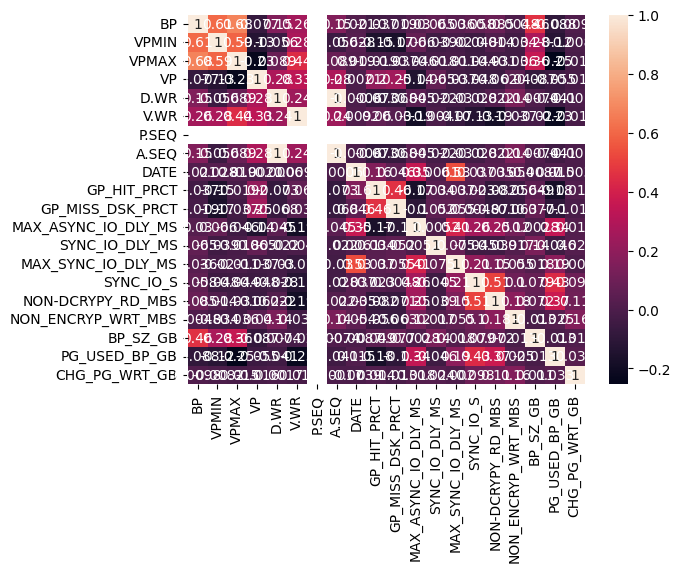

In [ ]:
# prompt: plot heat map

import seaborn as sns

sns.heatmap(dados_numerico.corr(), annot=True)


In [ ]:
# organizando as variáveis para o modelo

X = dados_numerico[['VPMIN', 'VPMAX', 'VP', 'D.WR', 'V.WR', 'P.SEQ', 'A.SEQ']]

Y = dados_numerico['MAX_ASYNC_IO_DLY_MS']

# Y = dados_numerico['GP_HIT_PRCT']

# Y = dados_numerico[['GP_HIT_PRCT', 'GP_MISS_DSK_PRCT', 'MAX_ASYNC_IO_DLY_MS', 'SYNC_IO_DLY_MS', 'MAX_SYNC_IO_DLY_MS', 'SYNC_IO_S', 'NON-DCRYPY_RD_MBS', 'NON_ENCRYP_WRT_MBS', 'BP_SZ_GB', 'PG_USED_BP_GB', 'CHG_PG_WRT_GB']]

In [ ]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [ ]:
# Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [ ]:
# Define a list of models
models = [
     LogisticRegression()
    ,RandomForestClassifier()
    ,SVC()
    ,KNeighborsClassifier()
    ,GaussianNB()
    ,DecisionTreeClassifier()
 #  ,XGBClassifier()
 #  ,f1_score(Y_test, Y_train, average='weighted')
 #  ,accuracy_score(Y_test, Y_train)
]

In [ ]:
# Train each model and evaluate its performance
for model in models:
    model.fit(X_train, Y_train)
    print(f"Model: {model.__class__.__name__}, Accuracy: {model.score(X_test, Y_test)}")

# Select the model with the best performance and use it for further analysis
best_model = max(models, key=lambda model: model.score(X_test, Y_test))
print(f"Best Model: {best_model.__class__.__name__}")

Model: LogisticRegression, Accuracy: 0.04833836858006042
Model: RandomForestClassifier, Accuracy: 0.054380664652567974
Model: SVC, Accuracy: 0.050981873111782476
Model: KNeighborsClassifier, Accuracy: 0.028700906344410877
Model: GaussianNB, Accuracy: 0.0022658610271903325
Model: DecisionTreeClassifier, Accuracy: 0.0547583081570997
Best Model: DecisionTreeClassifier


In [ ]:
shap.initjs()

In [ ]:
# Create a Shapley values explainer
explainer = shap.TreeExplainer(best_model)

# Calculate Shapley values for the first 10 rows of the DataFrame
shap_values = explainer.shap_values(X_train)

In [ ]:
explainer
shap_values[1].shape

(2311, 5)

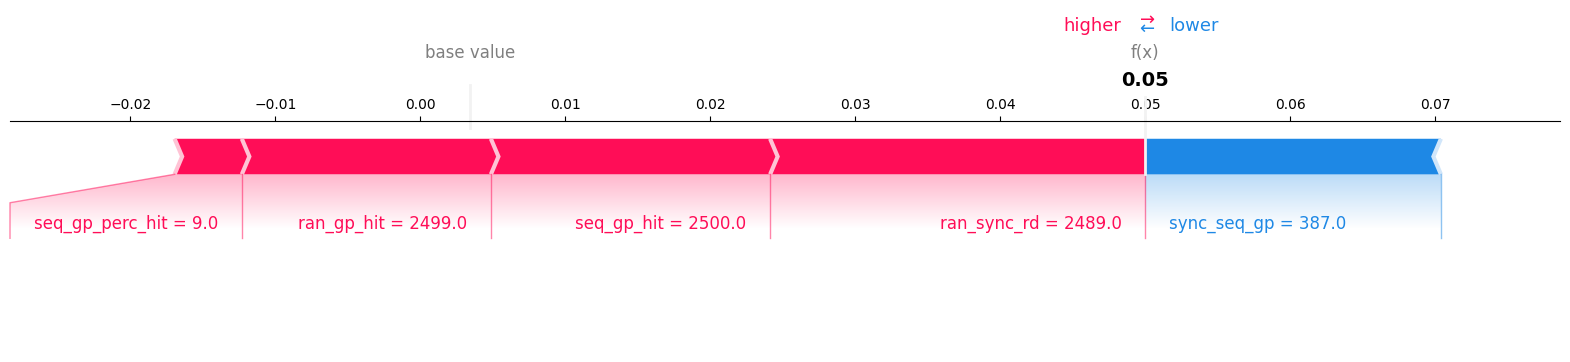

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_train.iloc[0,:], matplotlib= True)

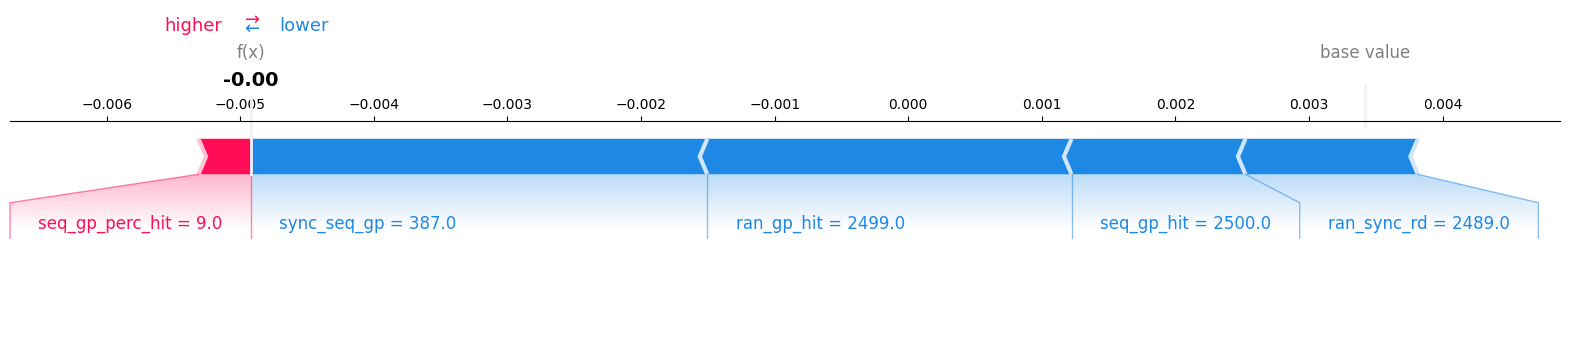

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[1][0,:], X_train.iloc[0,:], matplotlib= True)